In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.lines as mlines
import os
import reionizer


# Colors
from palettable.colorbrewer.sequential import Purples_6
from palettable.colorbrewer.sequential import Oranges_6
from palettable.colorbrewer.sequential import Greens_6
from palettable.colorbrewer.sequential import Blues_6
from palettable.colorbrewer.sequential import Reds_6

seqcols = [Blues_6.hex_colors, Greens_6.hex_colors, Purples_6.hex_colors, Oranges_6.hex_colors]

LFz_data_dir = os.environ['LYA_DATA_DIR']+'data/models/' 
LFz_dir = LFz_data_dir+'MTT15_UVLF/LF_pred/' #inside models folder call MTT15_UVLF/LF_pred/ folder
LFz_files = sorted(reionizer.insensitive_glob(LFz_dir+'LF_pred_z*.txt')) #calls each file in modelled data * will be replaced with corresponding zval

#Call LF_pred files
LFz_tab = np.array([float(f.split('LF_pred_z')[-1].split('.txt')[0]) for f in LFz_files]) 


def load_uvf_pandas(ufl_filename): 
    """
    Load table into pandas df
    """
    uvf_tab_df = pd.read_csv(ufl_filename, skiprows=1, delim_whitespace=True)
    
    # Shuffle the column names to remove the '#' from the first column
    uvf_tab_df.columns = np.roll(uvf_tab_df.columns, -1)

    # Cut off the last (empty) column
    uvf_tab_df = uvf_tab_df.iloc[:, :-1]

    return uvf_tab_df

#Define variables by calling arrays 
zval_array = np.array([5.9,6.8])






/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


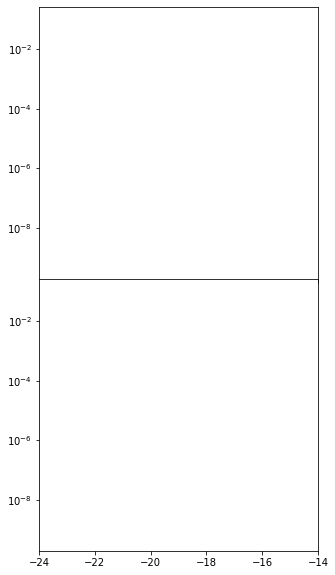

In [145]:
# Plot

for zz,zval in enumerate (LFz_tab): 
    if zval in zval_array:
        LFz_tab = load_uvf_pandas(LFz_files[zz])
#         if zval == 5.9:
#             my_color='red'
#         else:
#             my_color='blue' 
        plt.plot(LFz_tab['Muv'],LFz_tab['ndens'],color=my_color)        

fig = plt.figure(figsize=(5,10))
axs= fig.subplots(ncols=1,nrows=2, gridspec_kw={'hspace': 0},sharex=True, sharey=True)
plt.xlim(-24,-14)
y=[5e-10,1e-5,1e-1]
plt.semilogy(y)



In [ ]:
#Plotting
fig = plt.figure(figsize=(5,10))
axs= fig.subplots(ncols=1,nrows=2, gridspec_kw={'hspace': 0},sharex=True, sharey=True)
plt.plot(uvf_tab['Muv'],uvf_tab['ndens'],label='z~0',color='blue') 
plt.plot(uvf_tab1['Muv'],uvf_tab1['ndens'],label='z~0.3',color='green') 

plt.xlim(-24.,-14.)
plt.semilogy()